**This is a notebook explaining the reasons for the dropout of the employees.**
*It aims at providing intuition and deep insights about how to explore and analyse data and it can be very heplful for the beginners*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from pandas import DataFrame,Series
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn import tree
from collections import Counter
from sklearn.decomposition import PCA as sklearnPCA
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking rimport numpy as np # linear algebra

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

HR_comma_sep.csv



In [2]:
f=pd.read_csv('../input/HR_comma_sep.csv')
data=DataFrame(f)
data.head()[:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


**Lets focus on salary feature as it can be a key feature in telling the right cause for the dropout**

In [3]:
y=data['left'].tolist()
inputs=data.drop('left',1)
Inputs=inputs.drop('average_montly_hours',1)
salary=Inputs.groupby('salary').mean()
sum_salary=Counter(Inputs['salary'])
print("Salary dict:   "+'{}'.format(sum_salary))

Salary dict:   Counter({'low': 7316, 'medium': 6446, 'high': 1237})


**It can be seen that even the high paid employees are dropped of the office.**
*Lets find put the correct reason for it.Also we have dropped 'average_montly_hours' feature because it is almost same for all the three classes of paid people and also it has much higher scale than any other data of feature*

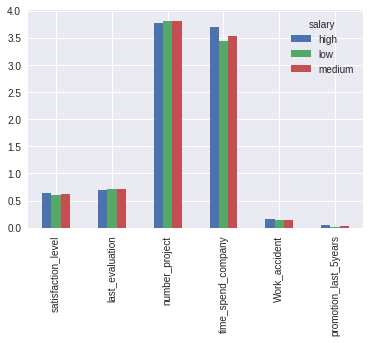

In [4]:
Salary=salary.transpose()
plt.figure(figsize=(20,10))
Salary.plot(kind='bar')

**Now it can be inferred that "number project" and "time_spend_company" can be the features for which there has been dropout of employees.Lets check our observation**

**Trying out PCA and Exploring variance**

In [5]:
X=inputs.drop('sales',1)
X_train=X.drop('salary',1)
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [6]:
salary

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years
salary,,,,,,
high,0.637470,0.704325,3.767179,3.692805,0.155214,0.058205
low,0.600753,0.717017,3.799891,3.438218,0.142154,0.009021
medium,0.621817,0.717322,3.813528,3.529010,0.145361,0.028079


In [7]:
X_std=StandardScaler().fit_transform(X_train)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


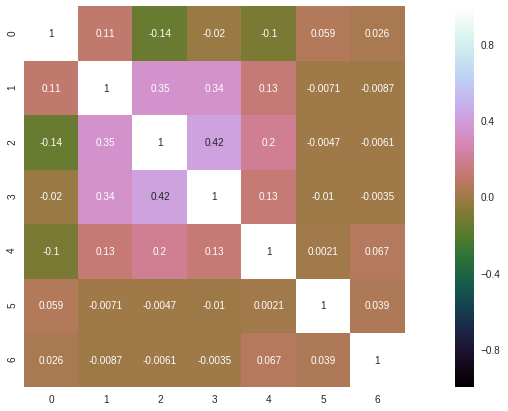

In [8]:
plt.figure(figsize=(18,7))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

**Now here we can see that "project" and "time_spend_company" were the real reasons behind the dropout as the covariance matrix shows that as these two factors increase,"satisfaction_value" decreases.Hence our assumption was absolutely correct.**

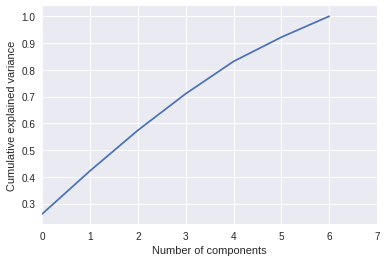

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Here we can see that 6 components can explain 90% of the variance in the data.Thus PCA is an important tool to avoid redundant features**